In [98]:
## Utility and Data Wrangling
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## Plotting and Viz
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import scipy.stats as stats

In [2]:
dataset = pd.read_csv('../data/20220411-161754_dataset.csv')

In [3]:
dfInsurance = dataset.copy()

In [4]:
clusters_2 = pd.read_csv('../data/clusters_1.csv')

In [5]:
dfInsurance = dfInsurance.merge(clusters_2, on = 'cod_cust_id')

In [6]:
dfInsurance.head()

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,fe_bin_plob_wcomp,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,fe_amt_plob_motor_scale,fe_amt_plob_life_scale,fe_amt_plob_health_scale,fe_amt_plob_wcomp_scale,fe_amt_plob_household_scale,Clusters_1
0,1,1985,34,2 - High School,4354.0,1,1,380.97,0.390032,375.85,...,D,F,Q2,Q3,4.84396,4.49746,2.85159,1.67637,1.87083,2
1,2,1981,21,2 - High School,1353.0,4,1,-131.13,1.116503,77.46,...,A,B,Q4,Q4,1.85994,7.23583,2.35626,4.08612,5.29662,3
2,3,1991,46,1 - Basic,4554.0,3,0,504.67,0.284810,206.15,...,A,D,Q2,Q3,3.66995,6.00000,2.48798,4.06937,3.68586,3
3,4,1990,35,3 - BSc/MSc,2197.0,4,1,-16.99,0.986665,182.48,...,C,F,Q2,Q4,3.25395,3.97534,3.54088,2.26907,1.34688,2
4,5,1986,43,3 - BSc/MSc,3526.0,4,1,35.23,0.904281,338.62,...,C,F,Q2,Q4,4.63484,2.36454,3.09260,2.86798,1.41147,0


In [7]:
dfInsurance.shape

(10270, 37)

In [8]:
dfInsurance.isna().sum()

cod_cust_id                       0
dt_fpy                            0
atr_cust_age                      0
dsc_edu_deg                      17
amt_gms                           0
atr_gla                           0
flg_children                      0
amt_cmv                           0
rt_cr                             0
amt_plob_motor                    0
amt_plob_household                0
amt_plob_health                   0
amt_plob_life                     0
amt_plob_wcomp                    0
atr_edu_deg                       0
outlier_candidate              9555
amt_premium_total                 0
DATA_MAIN_CUT                     0
atr_fpy_to_date                   0
rt_plob_life                      0
rt_plob_household                 0
rt_plob_motor                     0
rt_plob_health                    0
rt_plob_wcomp                     0
fe_bin_plob_motor                 0
fe_bin_plob_life                  0
fe_bin_plob_health                0
fe_bin_plob_wcomp           

In [9]:
dfInsurance.dtypes

cod_cust_id                      int64
dt_fpy                           int64
atr_cust_age                     int64
dsc_edu_deg                     object
amt_gms                        float64
atr_gla                          int64
flg_children                     int64
amt_cmv                        float64
rt_cr                          float64
amt_plob_motor                 float64
amt_plob_household             float64
amt_plob_health                float64
amt_plob_life                  float64
amt_plob_wcomp                 float64
atr_edu_deg                    float64
outlier_candidate               object
amt_premium_total              float64
DATA_MAIN_CUT                   object
atr_fpy_to_date                float64
rt_plob_life                   float64
rt_plob_household              float64
rt_plob_motor                  float64
rt_plob_health                 float64
rt_plob_wcomp                  float64
fe_bin_plob_motor               object
fe_bin_plob_life         

In [10]:
dfInsurance['dt_fpy'] = dfInsurance['dt_fpy'].astype('int64')
dfInsurance['atr_cust_age'] = dfInsurance['atr_cust_age'].astype('int64')
dfInsurance['atr_gla'] = dfInsurance['atr_gla'].astype('int64')
dfInsurance['flg_children'] = dfInsurance['flg_children'].astype('int64')

#dfInsurance['dt_fpy'] = pd.to_datetime(dfInsurance['dt_fpy'], format='%Y')

#dfInsurance.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
def interquartile_range(column):
    """Checks if data is 1.5 times the interquartile range greater than the third quartile (Q3) 
    or 1.5 times the interquartile range less than the first quartile (Q1)
    
    param column: a series or column from a dataset containing numerical data 
    output: returns the superior and inferior values where observations are below or above 1.5 times the interquartile range 
    """
    distance = 1.5 * (np.nanpercentile(column, 75) - np.nanpercentile(column, 25))
    lim_sup= distance + np.nanpercentile(column, 90)
    lim_inf= np.nanpercentile(column, 10) - distance
    
    return lim_sup, lim_inf


In [12]:
#negatives
dfInsurance.loc[(dfInsurance['amt_plob_motor'] < 0) | (dfInsurance['amt_plob_household'] < 0) | (dfInsurance['amt_plob_health'] < 0) | (dfInsurance['amt_plob_life'] < 0) | (dfInsurance['amt_plob_wcomp'] < 0)]
dfInsurance.loc[(dfInsurance['amt_plob_motor'] < 0)] # 1
dfInsurance.loc[(dfInsurance['amt_plob_household'] < 0)] # 1092
dfInsurance.loc[(dfInsurance['amt_plob_health'] < 0)] # 1
dfInsurance.loc[(dfInsurance['amt_plob_life'] < 0)] # 666
dfInsurance.loc[(dfInsurance['amt_plob_wcomp'] < 0)] # 926


,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,fe_bin_plob_wcomp,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,fe_amt_plob_motor_scale,fe_amt_plob_life_scale,fe_amt_plob_health_scale,fe_amt_plob_wcomp_scale,fe_amt_plob_household_scale,Clusters_1
28,29,1995,64,3 - BSc/MSc,7277.0,4,0,264.17,0.496325,301.28,...,NEGATIVES,G,Q2,Q3,4.42510,-1.56459,3.35568,-1.00369,1.00000,1
29,30,1980,44,3 - BSc/MSc,5320.0,3,0,2.00,0.955454,524.21,...,NEGATIVES,F,Q2,Q4,5.66278,0.96020,1.15976,-1.41344,1.08055,1
30,31,1988,41,2 - High School,4295.0,4,1,427.76,0.190213,483.09,...,NEGATIVES,NEGATIVES,Q2,Q3,5.43550,0.49837,1.93751,-1.42266,-1.19409,1
51,52,1982,50,3 - BSc/MSc,6467.0,4,1,-14714.08,25.360000,557.44,...,NEGATIVES,F,Q4,Q1,5.01314,0.62200,0.00000,-2.00000,1.00000,1
64,65,1982,43,3 - BSc/MSc,4587.0,3,0,-124.32,1.188979,452.53,...,NEGATIVES,NEGATIVES,Q1,Q4,5.26658,2.28169,2.15960,-1.33886,-1.60443,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,10244,1988,46,4 - PhD,4555.0,1,1,500.55,0.192704,569.55,...,NEGATIVES,F,Q2,Q3,5.91339,-1.56459,0.76609,-2.00000,1.58853,2
10222,10249,1977,49,2 - High School,4421.0,4,1,-10.32,0.974868,484.87,...,NEGATIVES,G,Q2,Q4,5.44533,-1.27431,1.73610,-1.01290,1.00000,2
10228,10255,1994,53,3 - BSc/MSc,3880.0,1,1,516.44,0.075347,529.99,...,NEGATIVES,G,Q2,Q3,5.69473,0.36620,0.85486,-1.24585,0.70333,1
10229,10256,1980,71,3 - BSc/MSc,7896.0,4,0,-28.22,1.005691,423.19,...,NEGATIVES,G,Q1,Q4,5.10441,0.63053,2.55292,-1.32965,0.63000,0


# Check data distribution

#### Customer Monetary Value

Text(0.5, 0.98, 'Gross Monthly Salary')

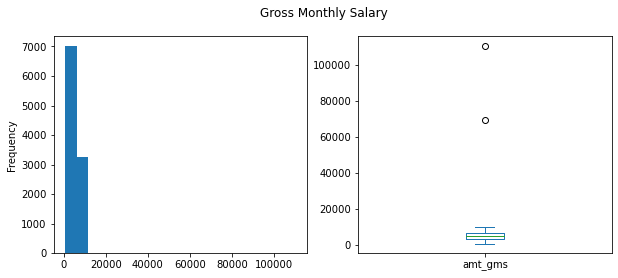

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_gms'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_gms'].plot(kind='box', ax=axes[1])
plt.suptitle("Gross Monthly Salary")


In [14]:
dfInsurance = dfInsurance.loc[dfInsurance['amt_gms'] < 60000]

#### Customer Monetary Value

Text(0.5, 0.98, 'Customer Monetary Value')

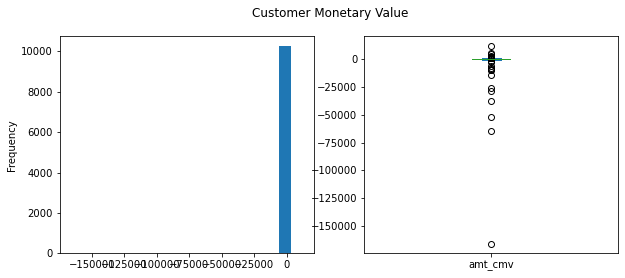

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_cmv'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_cmv'].plot(kind='box', ax=axes[1])
plt.suptitle("Customer Monetary Value")


In [16]:
dfInsurance['amt_cmv'].min()

-165680.424

##### Convert min value to 0

In [17]:
dfInsurance['test_feature'] = dfInsurance['amt_cmv'] + 165680.424

In [18]:
dfInsurance['test_feature'] = np.log(dfInsurance['test_feature'] + 1) 

<AxesSubplot:>

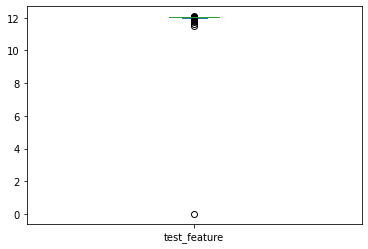

In [19]:
dfInsurance['test_feature'].plot(kind='box')

In [20]:
dfInsurance['test_feature'].describe()

count    10268.000000
mean        12.017797
std          0.118850
min          0.000000
25%         12.017766
50%         12.018948
75%         12.020233
max         12.087049
Name: test_feature, dtype: float64

In [21]:
dfInsurance = dfInsurance.loc[dfInsurance['amt_cmv'] > -75000]

#### Claims Rate

Text(0.5, 0.98, 'Claims Rate')

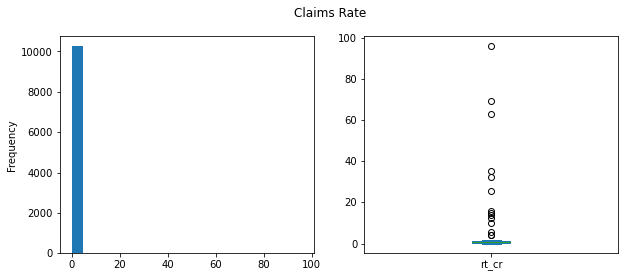

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['rt_cr'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['rt_cr'].plot(kind='box', ax=axes[1])
plt.suptitle("Claims Rate")


In [23]:
dfInsurance.loc[dfInsurance['rt_cr'] > 2]

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,fe_amt_plob_motor_scale,fe_amt_plob_life_scale,fe_amt_plob_health_scale,fe_amt_plob_wcomp_scale,fe_amt_plob_household_scale,Clusters_1,test_feature
51,52,1982,50,3 - BSc/MSc,6467.0,4,1,-14714.0800,25.360000,557.44,...,F,Q4,Q1,5.01314,0.62200,0.00000,-2.00000,1.00000,1,11.924819
112,113,1997,37,4 - PhD,4707.0,1,1,-8719.0425,15.650000,518.32,...,G,Q4,Q1,5.00965,0.40000,1.16622,1.20000,0.00000,1,11.963761
135,136,1997,28,3 - BSc/MSc,4352.0,4,1,-10198.9120,14.800000,297.61,...,D,Q4,Q1,4.16397,7.00000,2.93872,-1.14286,3.00000,2,11.954289
653,656,1974,53,3 - BSc/MSc,6558.0,3,1,-64891.0000,96.000000,410.30,...,E,Q4,Q1,5.00000,4.00000,2.00000,2.00000,2.38650,1,11.520799
673,676,1994,79,2 - High School,8870.0,1,0,-52382.7600,63.000000,197.48,...,C,Q4,Q1,4.00000,5.00000,3.00392,3.00000,4.00000,2,11.637783
705,708,1991,25,3 - BSc/MSc,3267.0,1,1,-28945.4000,35.000000,175.70,...,C,Q4,Q1,3.00000,4.49202,3.00454,1.83492,4.49649,2,11.825808
756,759,1988,24,3 - BSc/MSc,2233.0,1,1,-10107.3720,12.600000,193.37,...,C,Q4,Q1,3.81129,1.00000,3.00392,3.00000,4.79451,0,11.954877
790,794,1980,33,3 - BSc/MSc,2739.0,3,1,-7851.1720,13.900000,127.58,...,F,Q4,Q1,2.00000,3.00000,3.00824,1.40000,1.44366,1,11.969275
914,918,1986,64,2 - High School,6710.0,4,0,-26130.4520,32.300000,135.58,...,C,Q4,Q1,3.00000,6.00000,3.00196,4.00352,4.12061,2,11.846185
948,952,1998,40,3 - BSc/MSc,3172.0,3,1,-2642.9060,5.600000,501.65,...,NEGATIVES,Q4,Q1,5.00816,-1.00000,2.00000,-1.00000,-1.44500,1,12.001742


#### Premiums Motor

Text(0.5, 0.98, 'Motor premiums')

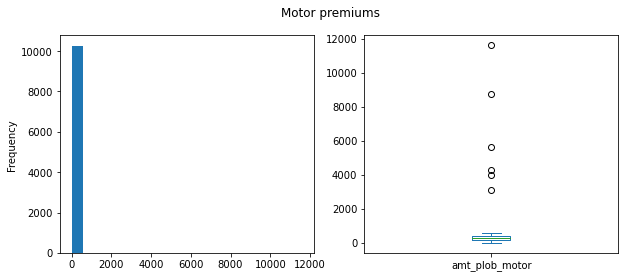

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_motor'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_motor'].plot(kind='box', ax=axes[1])
plt.suptitle("Motor premiums")


#### Premiums household

Text(0.5, 0.98, 'Household premiums')

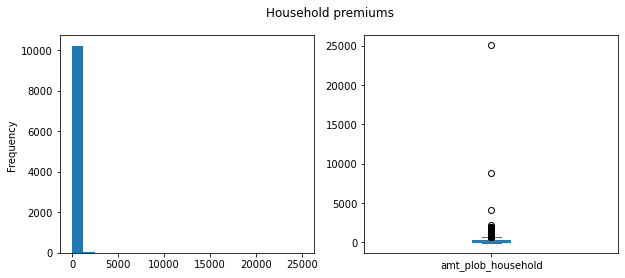

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_household'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_household'].plot(kind='box', ax=axes[1])
plt.suptitle("Household premiums")


In [26]:
dfInsurance.loc[dfInsurance['amt_plob_household'] > 20000]

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,fe_amt_plob_motor_scale,fe_amt_plob_life_scale,fe_amt_plob_health_scale,fe_amt_plob_wcomp_scale,fe_amt_plob_household_scale,Clusters_1,test_feature
8844,8867,1978,44,2 - High School,5236.0,4,1,473.54,0.980537,508.43,...,A,Q2,Q1,5.00877,1.27007,0.57699,1.30582,7.0,1,12.020676


#### Premiums health

Text(0.5, 0.98, 'Health premiums')

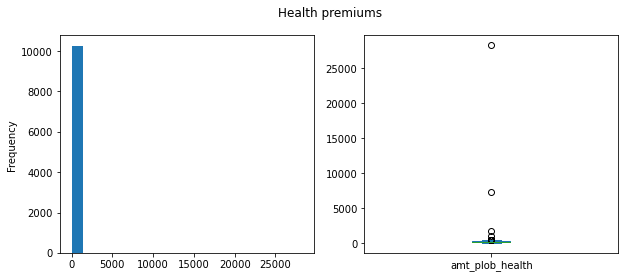

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_health'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_health'].plot(kind='box', ax=axes[1])
plt.suptitle("Health premiums")


In [28]:
dfInsurance.loc[dfInsurance['amt_plob_health'] > 25000]

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,fe_amt_plob_motor_scale,fe_amt_plob_life_scale,fe_amt_plob_health_scale,fe_amt_plob_wcomp_scale,fe_amt_plob_household_scale,Clusters_1,test_feature
9127,9150,1985,22,2 - High School,1974.0,3,1,804.05,0.971735,26.34,...,A,Q2,Q1,1.0,5.0,4.0,4.02363,6.00885,0,12.022663


#### Premiums life

Text(0.5, 0.98, 'Life premiums')

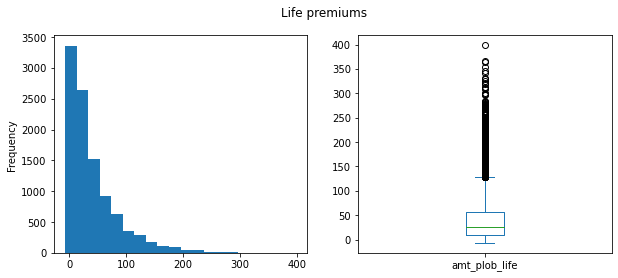

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_life'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_life'].plot(kind='box', ax=axes[1])
plt.suptitle("Life premiums")


#### Premiums Work Compensation

Text(0.5, 0.98, 'Work Compensation premiums')

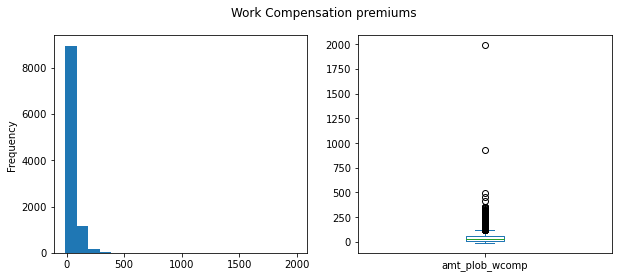

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_wcomp'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_wcomp'].plot(kind='box', ax=axes[1])
plt.suptitle("Work Compensation premiums")


In [31]:
dfInsurance.loc[dfInsurance['amt_plob_wcomp'] > 750]

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,fe_amt_plob_motor_scale,fe_amt_plob_life_scale,fe_amt_plob_health_scale,fe_amt_plob_wcomp_scale,fe_amt_plob_household_scale,Clusters_1,test_feature
5072,5085,1994,57,2 - High School,6659.0,3,0,2314.21,0.135528,350.51,...,D,Q2,Q2,4.71363,4.13716,2.59538,5.00000,4.00000,1,12.031693
7944,7962,1995,74,3 - BSc/MSc,8003.0,3,0,1457.99,0.831583,431.86,...,E,Q2,Q1,5.00193,2.00000,3.25460,4.44162,2.19325,1,12.026584


## Geographic location area

In [32]:
#lim_sup, lim_inf = interquartile_range(dfInsurance['amt_cmv'])

#plt.figure(figsize=(10, 8));
#sns.barplot(x='dsc_edu_deg', y='amt_cmv', data=dfInsurance.loc[(dfInsurance['amt_cmv'] < lim_sup) & (dfInsurance['amt_cmv'] > lim_inf)], ci=None, palette='tab10');
#plt.xlabel('Educational Degree', fontsize=16);
#plt.ylabel## Geographic location area('Customer Monetary Value', fontsize=16);
#plt.title('Customer Monetary Value vs Educational Degree', fontsize= 18);

#### Customer Monetary Value

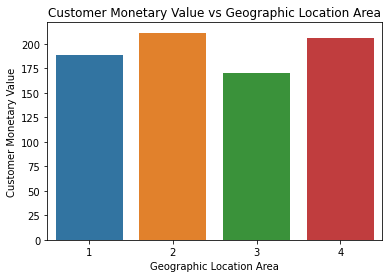

In [33]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_cmv', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Customer Monetary Value', fontsize=10);
plt.title('Customer Monetary Value vs Geographic Location Area', fontsize= 12);

#### Claims rate

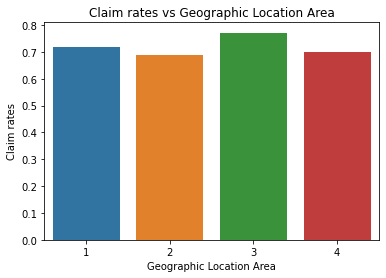

In [34]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='rt_cr', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Claim rates', fontsize=10);
plt.title('Claim rates vs Geographic Location Area', fontsize= 12);

#### Gross Monthly Salary

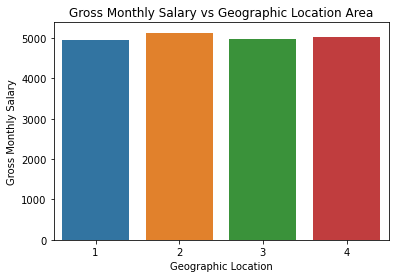

In [35]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_gms', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location', fontsize=10);
plt.ylabel('Gross Monthly Salary', fontsize=10);
plt.title('Gross Monthly Salary vs Geographic Location Area', fontsize= 12);

#### Total premium

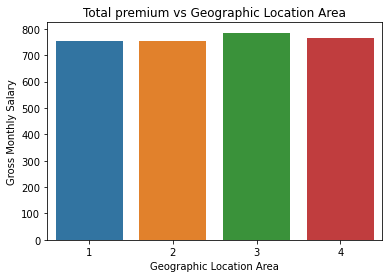

In [36]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_premium_total', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Gross Monthly Salary', fontsize=10);
plt.title('Total premium vs Geographic Location Area', fontsize= 12);

#### Motor premium

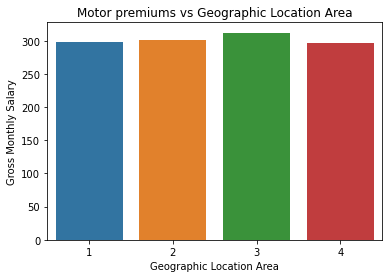

In [37]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_motor', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Gross Monthly Salary', fontsize=10);
plt.title('Motor premiums vs Geographic Location Area', fontsize= 12);

#### Household premium

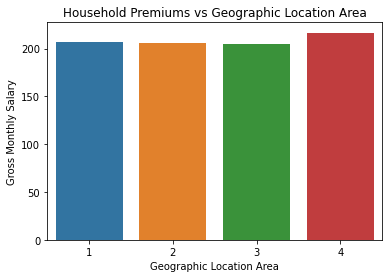

In [38]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_household', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Gross Monthly Salary', fontsize=10);
plt.title('Household Premiums vs Geographic Location Area', fontsize= 12);

#### Health premium

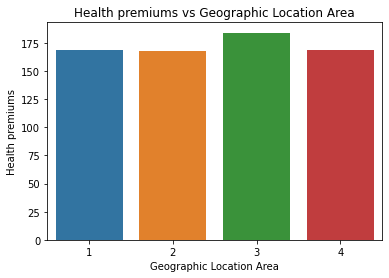

In [39]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_health', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Health premiums', fontsize=10);
plt.title('Health premiums vs Geographic Location Area', fontsize= 12);

#### Life premium

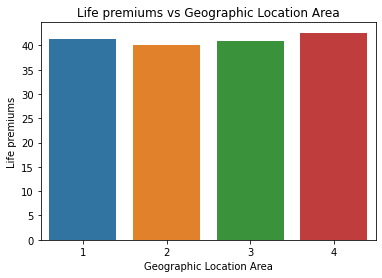

In [40]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_life', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Life premiums', fontsize=10);
plt.title('Life premiums vs Geographic Location Area', fontsize= 12);

#### Work compensation premium

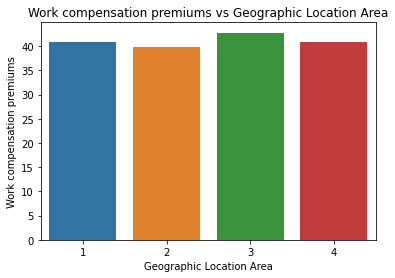

In [41]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_wcomp', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Work compensation premiums', fontsize=10);
plt.title('Work compensation premiums vs Geographic Location Area', fontsize= 12);

## Educational degree

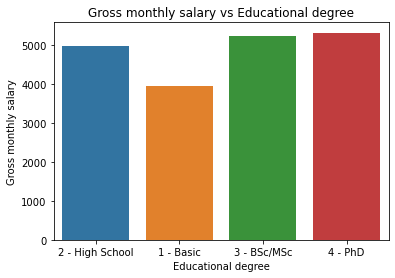

In [42]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_gms', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Gross monthly salary', fontsize=10);
plt.title('Gross monthly salary vs Educational degree', fontsize= 12);

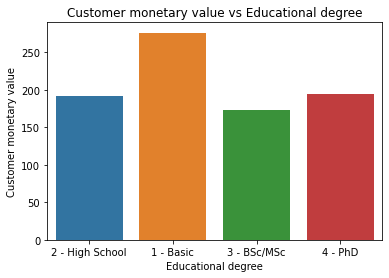

In [43]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_cmv', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Customer monetary value', fontsize=10);
plt.title('Customer monetary value vs Educational degree', fontsize= 12);

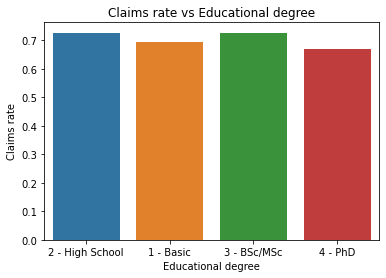

In [44]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='rt_cr', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Claims rate', fontsize=10);
plt.title('Claims rate vs Educational degree', fontsize= 12);

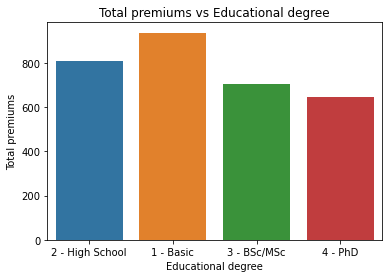

In [45]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_premium_total', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Total premiums', fontsize=10);
plt.title('Total premiums vs Educational degree', fontsize= 12);

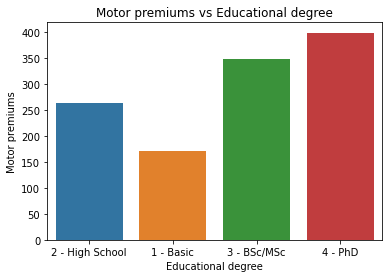

In [46]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_motor', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Motor premiums', fontsize=10);
plt.title('Motor premiums vs Educational degree', fontsize= 12);

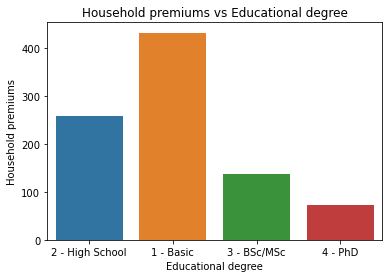

In [47]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_household', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Household premiums', fontsize=10);
plt.title('Household premiums vs Educational degree', fontsize= 12);

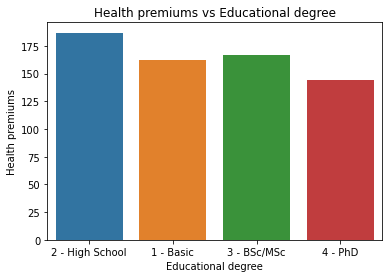

In [48]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_health', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Health premiums', fontsize=10);
plt.title('Health premiums vs Educational degree', fontsize= 12);

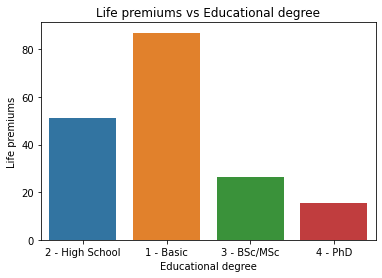

In [49]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_life', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Life premiums', fontsize=10);
plt.title('Life premiums vs Educational degree', fontsize= 12);

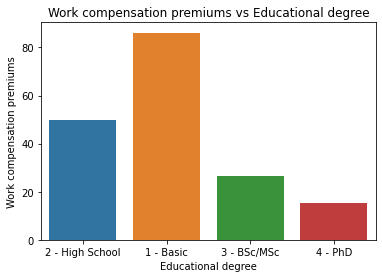

In [50]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_wcomp', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Work compensation premiums', fontsize=10);
plt.title('Work compensation premiums vs Educational degree', fontsize= 12);

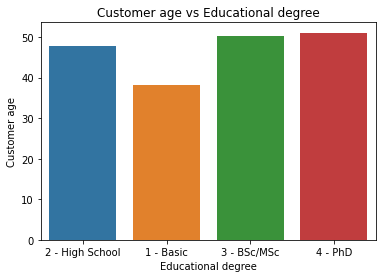

In [51]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='atr_cust_age', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Customer age', fontsize=10);
plt.title('Customer age vs Educational degree', fontsize= 12);

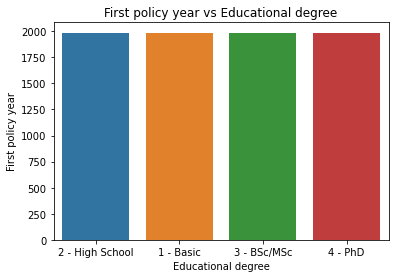

In [52]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='dt_fpy', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('First policy year', fontsize=10);
plt.title('First policy year vs Educational degree', fontsize= 12);

In [53]:
dfInsurance.head()

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,fe_amt_plob_motor_scale,fe_amt_plob_life_scale,fe_amt_plob_health_scale,fe_amt_plob_wcomp_scale,fe_amt_plob_household_scale,Clusters_1,test_feature
0,1,1985,34,2 - High School,4354.0,1,1,380.97,0.390032,375.85,...,F,Q2,Q3,4.84396,4.49746,2.85159,1.67637,1.87083,2,12.020119
1,2,1981,21,2 - High School,1353.0,4,1,-131.13,1.116503,77.46,...,B,Q4,Q4,1.85994,7.23583,2.35626,4.08612,5.29662,3,12.017030
2,3,1991,46,1 - Basic,4554.0,3,0,504.67,0.284810,206.15,...,D,Q2,Q3,3.66995,6.00000,2.48798,4.06937,3.68586,3,12.020863
3,4,1990,35,3 - BSc/MSc,2197.0,4,1,-16.99,0.986665,182.48,...,F,Q2,Q4,3.25395,3.97534,3.54088,2.26907,1.34688,2,12.017720
4,5,1986,43,3 - BSc/MSc,3526.0,4,1,35.23,0.904281,338.62,...,F,Q2,Q4,4.63484,2.36454,3.09260,2.86798,1.41147,0,12.018035


In [54]:
def scatterplots_views(columnName):
    
    lim_sup, lim_inf = interquartile_range(dfInsurance[columnName])

    fig, axes = plt.subplots(3, 2, figsize=(15,12))
    #educational degree
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='dsc_edu_deg', data=dfInsurance.loc[(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[0,0])
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='dsc_edu_deg', data=dfInsurance.loc[~(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[0,1])

    #geographic location
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='atr_gla', data=dfInsurance.loc[(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[1,0])
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='atr_gla', data=dfInsurance.loc[~(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[1,1])

    #children
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='flg_children', data=dfInsurance.loc[(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[2,0])
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='flg_children', data=dfInsurance.loc[~(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[2,1])

    

## Customer monetary value

In [55]:
negative_cmv = dfInsurance.loc[dfInsurance['amt_cmv'] < 0]
positive_cmv = dfInsurance.loc[dfInsurance['amt_cmv'] > 0]


#### Gross monthly salary

<AxesSubplot:xlabel='amt_gms', ylabel='amt_cmv'>

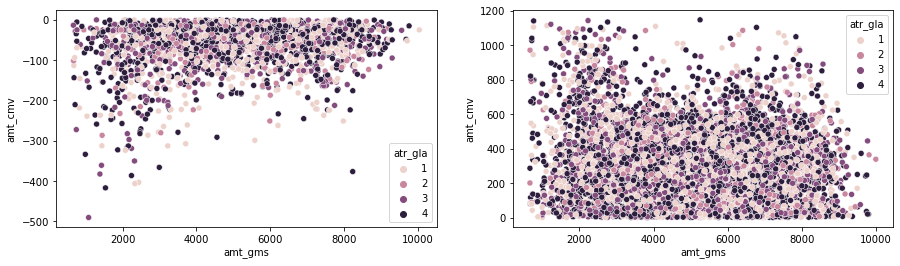

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
#educational degree
sns.scatterplot(x='amt_gms', y='amt_cmv', hue='atr_gla', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0])
sns.scatterplot(x='amt_gms', y='amt_cmv', hue='atr_gla', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[1])

#### Claim rate

<AxesSubplot:xlabel='rt_cr', ylabel='amt_cmv'>

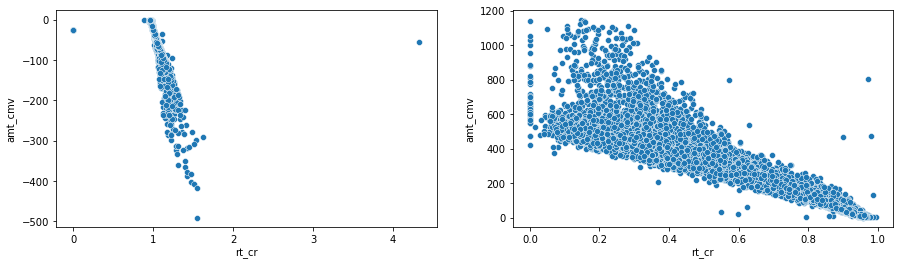

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
#educational degree
sns.scatterplot(x='rt_cr', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0])
sns.scatterplot(x='rt_cr', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[1])

#### Total premiums

<AxesSubplot:xlabel='amt_premium_total', ylabel='amt_cmv'>

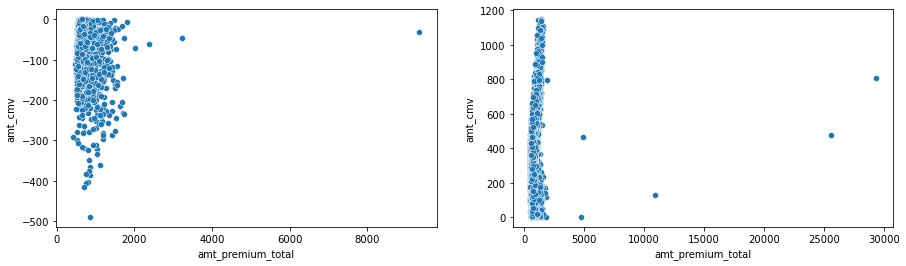

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
#educational degree
sns.scatterplot(x='amt_premium_total', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0])
sns.scatterplot(x='amt_premium_total', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[1])

#### Motor premiums

<AxesSubplot:xlabel='amt_plob_motor', ylabel='amt_cmv'>

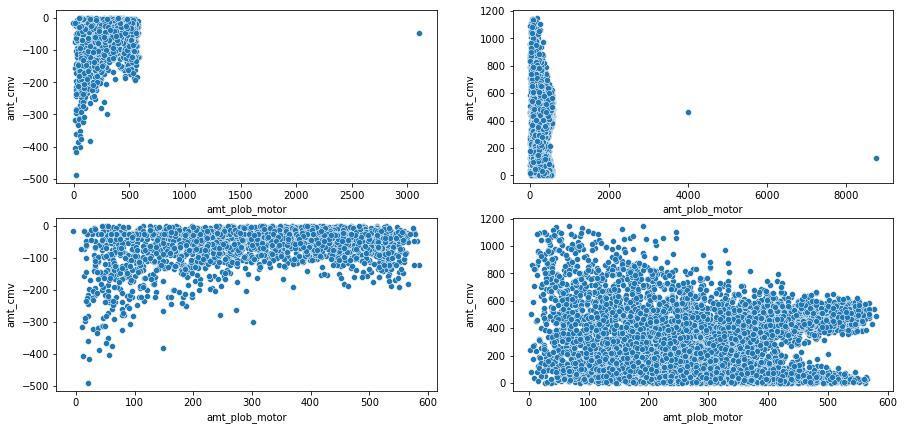

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_motor', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_motor', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_motor', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_motor', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_motor', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_motor', na=False)], ax=axes[1,1])

#### Household premiums

<AxesSubplot:xlabel='amt_plob_household', ylabel='amt_cmv'>

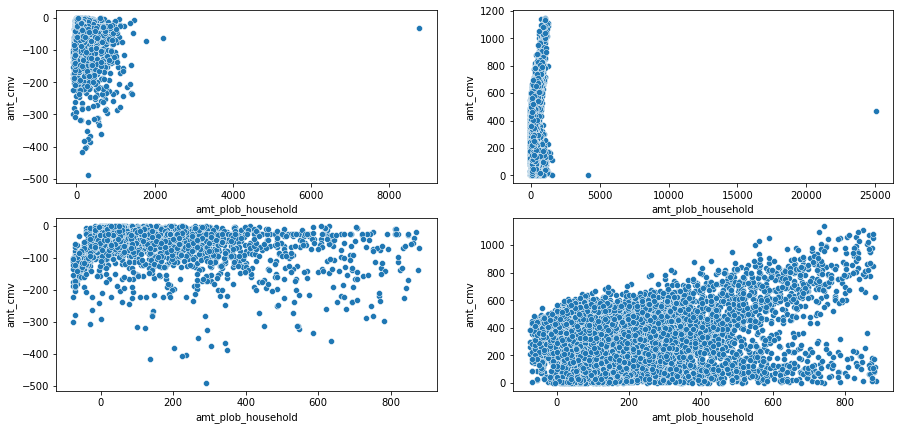

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_household', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_household', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_household', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_household', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_household', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_household', na=False)], ax=axes[1,1])

#### Health premiums

<AxesSubplot:xlabel='amt_plob_health', ylabel='amt_cmv'>

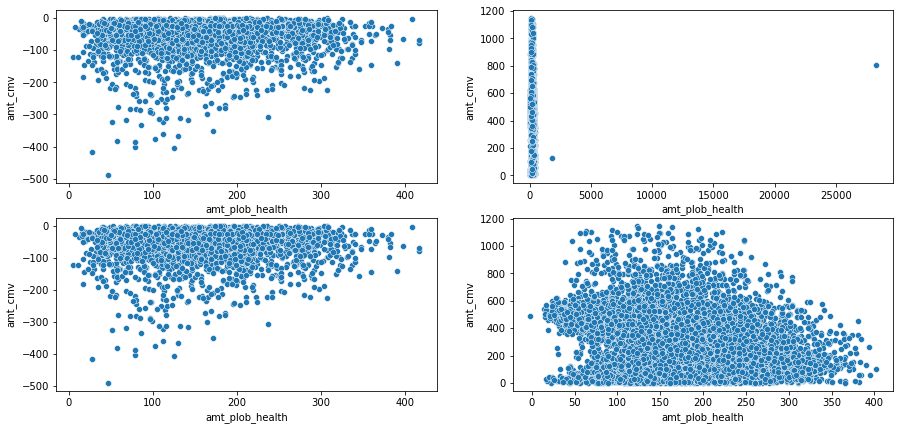

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_health', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_health', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_health', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_health', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_health', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_health', na=False)], ax=axes[1,1])

#### Life premiums

<AxesSubplot:xlabel='amt_plob_life', ylabel='amt_cmv'>

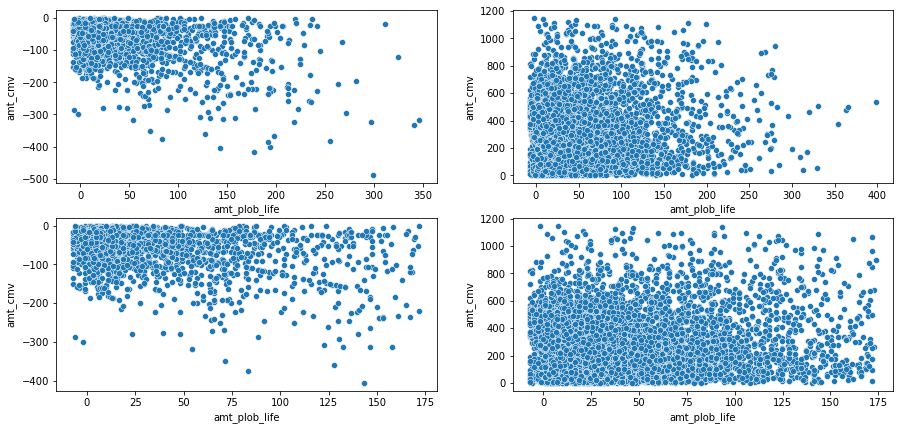

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_life', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_life', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_life', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_life', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_life', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_life', na=False)], ax=axes[1,1])

#### Work compensation premiums

<AxesSubplot:xlabel='amt_plob_wcomp', ylabel='amt_cmv'>

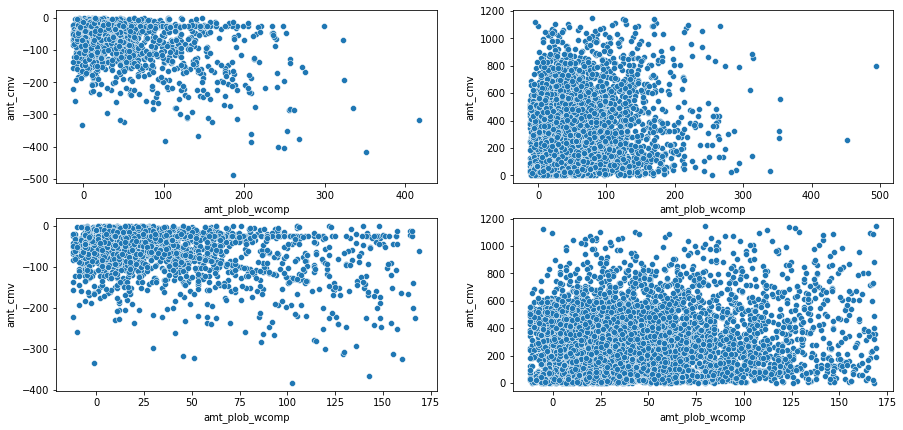

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_wcomp', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_wcomp', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_wcomp', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_wcomp', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_wcomp', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_wcomp', na=False)], ax=axes[1,1])

In [64]:
dfInsuranceA = dfInsurance.copy()

In [65]:
dfInsuranceA = dfInsurance.loc[~((dfInsurance['dt_fpy'] > 2022) | 
                        (dfInsurance['atr_cust_age'] > 100) | 
                        (dfInsurance['amt_cmv'] < -160000) |
                        (dfInsurance['amt_gms']> 15000) |
                        (dfInsurance['rt_cr'] > 2) |
                        (dfInsurance['amt_plob_motor'] > 2000)|
                        (dfInsurance['amt_plob_household'] > 5000)|
                        (dfInsurance['amt_plob_health'] > 5000)|
                        (dfInsurance['amt_plob_wcomp'] > 500)|
                        (dfInsurance['amt_premium_total'] > 5000))]

In [66]:
dfInsuranceA.isna().sum()

cod_cust_id                       0
dt_fpy                            0
atr_cust_age                      0
dsc_edu_deg                      17
amt_gms                           0
atr_gla                           0
flg_children                      0
amt_cmv                           0
rt_cr                             0
amt_plob_motor                    0
amt_plob_household                0
amt_plob_health                   0
amt_plob_life                     0
amt_plob_wcomp                    0
atr_edu_deg                       0
outlier_candidate              9555
amt_premium_total                 0
DATA_MAIN_CUT                     0
atr_fpy_to_date                   0
rt_plob_life                      0
rt_plob_household                 0
rt_plob_motor                     0
rt_plob_health                    0
rt_plob_wcomp                     0
fe_bin_plob_motor                 0
fe_bin_plob_life                  0
fe_bin_plob_health                0
fe_bin_plob_wcomp           

In [67]:
#dfInsuranceA.dropna(subset=['amt_plob_wcomp'], axis= 0, inplace=True)
dfInsuranceA = dfInsuranceA[dfInsuranceA['amt_plob_wcomp'].notna()] 

<AxesSubplot:ylabel='Frequency'>

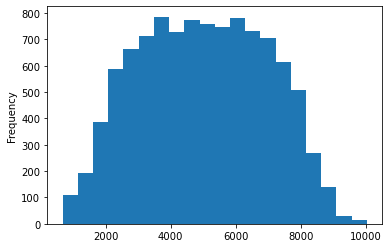

In [68]:
dfInsuranceA['amt_gms'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

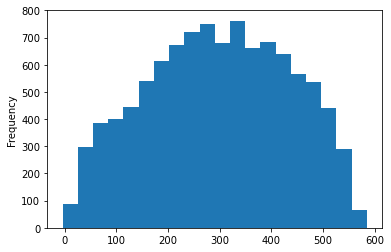

In [69]:
dfInsuranceA['amt_plob_motor'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

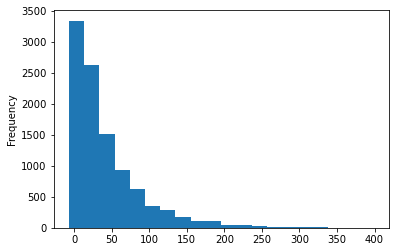

In [70]:
dfInsuranceA['amt_plob_life'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

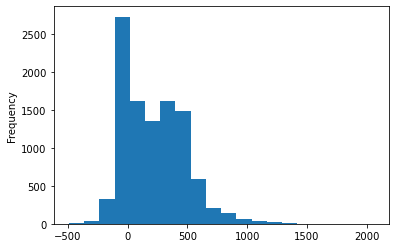

In [71]:
dfInsuranceA['amt_cmv'].plot(kind='hist', bins=20)

In [72]:
#dfInsuranceA['amt_plob_wcomp_log'].plot(kind='hist', bins=20)

premium life, household e work compensation com distribuições power law?

premium motor, health e gms com distribuição normal?

amt_cmv ???

# PCA

In [73]:
dfInsuranceA.columns

Index(['cod_cust_id', 'dt_fpy', 'atr_cust_age', 'dsc_edu_deg', 'amt_gms',
       'atr_gla', 'flg_children', 'amt_cmv', 'rt_cr', 'amt_plob_motor',
       'amt_plob_household', 'amt_plob_health', 'amt_plob_life',
       'amt_plob_wcomp', 'atr_edu_deg', 'outlier_candidate',
       'amt_premium_total', 'DATA_MAIN_CUT', 'atr_fpy_to_date', 'rt_plob_life',
       'rt_plob_household', 'rt_plob_motor', 'rt_plob_health', 'rt_plob_wcomp',
       'fe_bin_plob_motor', 'fe_bin_plob_life', 'fe_bin_plob_health',
       'fe_bin_plob_wcomp', 'fe_bin_plob_household',
       'fe_cmv_cr_quadrant_Type1', 'fe_cmv_cr_quadrant_Type2',
       'fe_amt_plob_motor_scale', 'fe_amt_plob_life_scale',
       'fe_amt_plob_health_scale', 'fe_amt_plob_wcomp_scale',
       'fe_amt_plob_household_scale', 'Clusters_1', 'test_feature'],
      dtype='object')

In [74]:
dfInsuranceA.columns

Index(['cod_cust_id', 'dt_fpy', 'atr_cust_age', 'dsc_edu_deg', 'amt_gms',
       'atr_gla', 'flg_children', 'amt_cmv', 'rt_cr', 'amt_plob_motor',
       'amt_plob_household', 'amt_plob_health', 'amt_plob_life',
       'amt_plob_wcomp', 'atr_edu_deg', 'outlier_candidate',
       'amt_premium_total', 'DATA_MAIN_CUT', 'atr_fpy_to_date', 'rt_plob_life',
       'rt_plob_household', 'rt_plob_motor', 'rt_plob_health', 'rt_plob_wcomp',
       'fe_bin_plob_motor', 'fe_bin_plob_life', 'fe_bin_plob_health',
       'fe_bin_plob_wcomp', 'fe_bin_plob_household',
       'fe_cmv_cr_quadrant_Type1', 'fe_cmv_cr_quadrant_Type2',
       'fe_amt_plob_motor_scale', 'fe_amt_plob_life_scale',
       'fe_amt_plob_health_scale', 'fe_amt_plob_wcomp_scale',
       'fe_amt_plob_household_scale', 'Clusters_1', 'test_feature'],
      dtype='object')

In [76]:
#dfInsuranceA['amt_plob_life'].describe()
#dfInsuranceA['amt_plob_life'] = 

In [88]:
#Normalize features

dfInsuranceA['sqrt_amt_cmv'] = np.where(min(dfInsuranceA['amt_cmv']) <= 0,
np.sqrt(dfInsuranceA['amt_cmv'] + abs(min(dfInsuranceA['amt_cmv'])) + 1),
np.sqrt(dfInsuranceA['amt_cmv']))

dfInsuranceA['log_amt_plob_life'] = np.where(min(dfInsuranceA['amt_plob_life']) <= 0,
np.log(dfInsuranceA['amt_plob_life'] + abs(min(dfInsuranceA['amt_plob_life'])) + 1),
np.log(dfInsuranceA['amt_plob_life']))

dfInsuranceA['log_amt_plob_household'] = np.where(min(dfInsuranceA['amt_plob_household']) <= 0,
np.log(dfInsuranceA['amt_plob_household'] + abs(min(dfInsuranceA['amt_plob_household'])) + 1),
np.log(dfInsuranceA['amt_plob_household']))

dfInsuranceA['log_amt_plob_wcomp'] = np.where(min(dfInsuranceA['amt_plob_wcomp']) <= 0,
np.log(dfInsuranceA['amt_plob_wcomp'] + abs(min(dfInsuranceA['amt_plob_wcomp'])) + 1),
np.log(dfInsuranceA['amt_plob_wcomp']))

#-------------------------------------------------

# dfInsuranceA['log_amt_plob_life'] = np.log(dfInsuranceA['amt_plob_life'] + 1) 
# dfInsuranceA['log_amt_plob_household'] = np.log(dfInsuranceA['amt_plob_household'] + 1) 
# dfInsuranceA['log_amt_plob_wcomp'] = np.log(dfInsuranceA['amt_plob_wcomp'] + 1)

# dfInsuranceA['log_amt_cmv'] = dfInsuranceA['amt_cmv'] + 490.2
# dfInsuranceA['log_amt_cmv'] = np.log(dfInsuranceA['log_amt_cmv'] + 1)

scaler = MinMaxScaler()
dfInsuranceA['minmax_amt_plob_health'] = scaler.fit_transform(dfInsuranceA[['amt_plob_health']])
dfInsuranceA['minmax_amt_plob_motor'] = scaler.fit_transform(dfInsuranceA[['amt_plob_motor']])
dfInsuranceA['minmax_amt_gms'] = scaler.fit_transform(dfInsuranceA[['amt_gms']])

#features_dataset = dfInsuranceA[['minmax_amt_plob_health', 'minmax_amt_plob_motor', 'minmax_amt_gms', 'log_amt_cmv', 'log_amt_plob_life', 'log_amt_plob_household', 'log_amt_plob_wcomp']]

C:\Users\PedroSantos\anaconda3\envs\dsacademy\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PedroSantos\anaconda3\envs\dsacademy\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PedroSantos\anaconda3\envs\dsacademy\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [89]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dfInsurance_scaler = StandardScaler()

In [ ]:
dfInsurance.columns

In [ ]:
df_temp = dfInsuranceA.drop(columns=['dsc_edu_deg'], inplace=True)

In [ ]:
df = dfInsuranceA[['amt_cmv','amt_gms','amt_plob_motor', 'amt_plob_household', 'amt_plob_wcomp', 'amt_plob_life']]

In [ ]:
df = dfInsurance_scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(df, columns=['amt_cmv','amt_gms','amt_plob_motor', 'amt_plob_household', 'amt_plob_wcomp', 'amt_plob_life'])

In [ ]:
df_scaled.head()

In [ ]:
features_dataset.head()

In [90]:


df = dfInsuranceA[['amt_cmv','amt_gms','amt_plob_motor', 'amt_plob_household', 'amt_plob_wcomp', 'amt_plob_life']]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [91]:
principalDf.head()

,principal component 1,principal component 2
0,-637.022880,4.174887
1,-3647.682236,-176.292073
2,-445.883712,234.909680
3,-2791.318367,-334.828471
4,-1461.172710,-288.678843


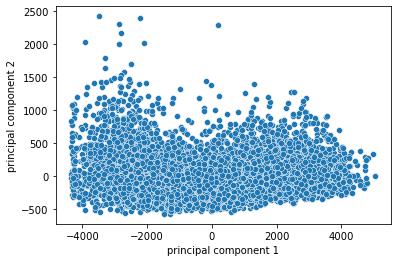

In [92]:
sns.scatterplot(data = principalDf, x='principal component 1', y='principal component 2');

In [ ]:
# clusters = pd.read_csv('../data/clusters_1.csv')

In [ ]:
# clusters.head()

In [ ]:
# principalDf.shape

In [ ]:
# clusters.shape

In [ ]:
# principalDf = principalDf.merge(clusters, right_index=True)

In [ ]:
# principalDf.shape

In [ ]:
dfInsuranceA.head()

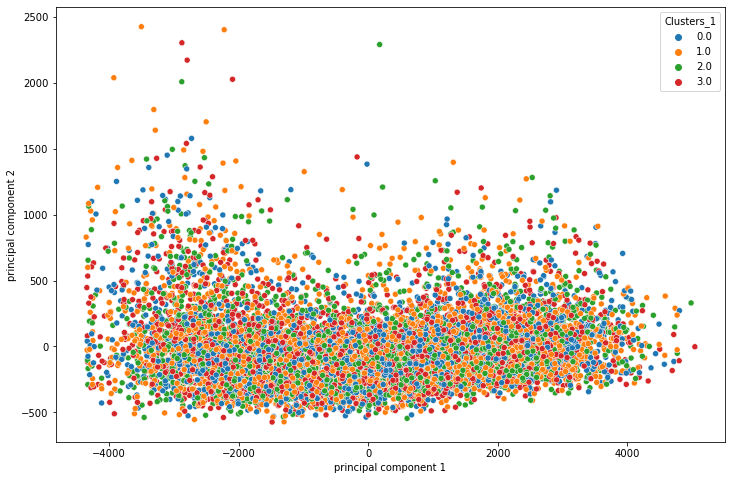

In [93]:
plt.figure(figsize=(12, 8));
sns.scatterplot(data = principalDf, x = 'principal component 1', y = 'principal component 2', 
                hue = dfInsuranceA['Clusters_1'], palette='tab10');

In [94]:
dfInsuranceA.columns

Index(['cod_cust_id', 'dt_fpy', 'atr_cust_age', 'dsc_edu_deg', 'amt_gms',
       'atr_gla', 'flg_children', 'amt_cmv', 'rt_cr', 'amt_plob_motor',
       'amt_plob_household', 'amt_plob_health', 'amt_plob_life',
       'amt_plob_wcomp', 'atr_edu_deg', 'outlier_candidate',
       'amt_premium_total', 'DATA_MAIN_CUT', 'atr_fpy_to_date', 'rt_plob_life',
       'rt_plob_household', 'rt_plob_motor', 'rt_plob_health', 'rt_plob_wcomp',
       'fe_bin_plob_motor', 'fe_bin_plob_life', 'fe_bin_plob_health',
       'fe_bin_plob_wcomp', 'fe_bin_plob_household',
       'fe_cmv_cr_quadrant_Type1', 'fe_cmv_cr_quadrant_Type2',
       'fe_amt_plob_motor_scale', 'fe_amt_plob_life_scale',
       'fe_amt_plob_health_scale', 'fe_amt_plob_wcomp_scale',
       'fe_amt_plob_household_scale', 'Clusters_1', 'test_feature',
       'minmax_amt_plob_health', 'minmax_amt_plob_motor', 'minmax_amt_gms',
       'log_amt_plob_life', 'log_amt_plob_household', 'log_amt_plob_wcomp',
       'sqrt_amt_cmv'],
      dtype='obj

In [95]:
df = dfInsuranceA[['sqrt_amt_cmv','minmax_amt_gms','minmax_amt_plob_motor', 'log_amt_plob_household', 'log_amt_plob_wcomp', 'log_amt_plob_life']]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

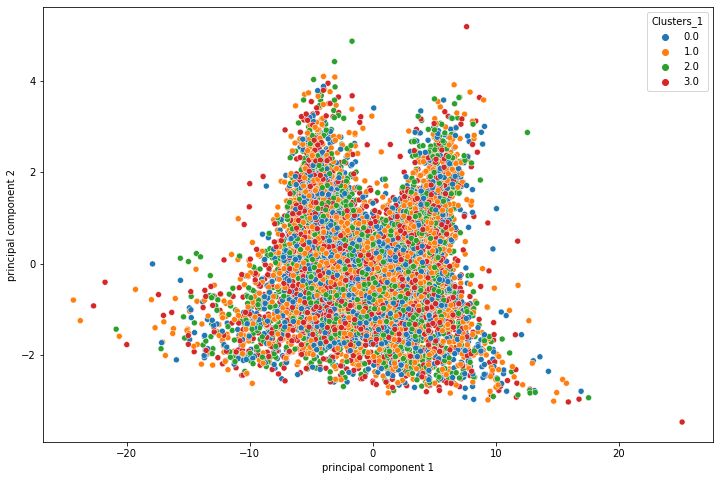

In [96]:
plt.figure(figsize=(12, 8));
sns.scatterplot(data = principalDf, x = 'principal component 1', y = 'principal component 2', 
                hue = dfInsuranceA['Clusters_1'], palette='tab10');

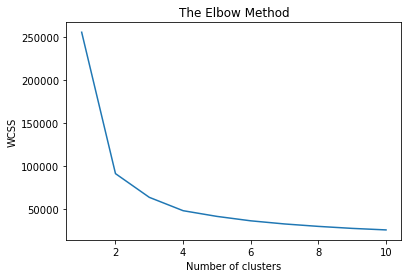

In [97]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [103]:
#df = dfInsuranceA[['sqrt_amt_cmv','minmax_amt_gms','minmax_amt_plob_motor', 'log_amt_plob_household', 'log_amt_plob_wcomp', 'log_amt_plob_life']]
df = dfInsuranceA[['minmax_amt_gms','minmax_amt_plob_motor', 'log_amt_plob_household', 'log_amt_plob_wcomp', 'log_amt_plob_life']]

pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(df)
reduced_data = pd.DataFrame(data = reduced_data)

In [104]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data)
clust_labels = kmeans.predict(reduced_data)
cent = kmeans.cluster_centers_
kmeans = pd.DataFrame(clust_labels)

Text(0, 0.5, 'PC2')

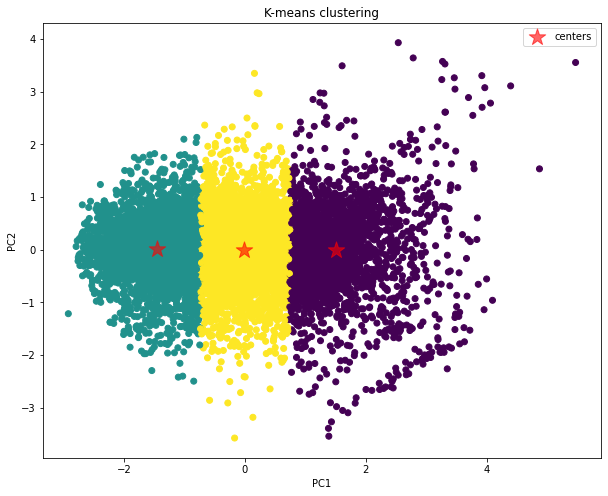

In [105]:
plt.figure(figsize=(10, 8))
# K-means clustering
plt.scatter(reduced_data[0],reduced_data[1],
                     c=kmeans[0], cmap='viridis')
plt.scatter(cent[:, 0], cent[:, 1],c='red', marker='*', s=300, alpha=0.6, label='centers')
plt.legend(loc='best')
plt.title('K-means clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [115]:
np.random.seed(42)
if "Set" not in dfInsurance.columns:
    dfInsuranceA["Set"] = np.random.choice(["train", "test"], p =[.7, .3], size=(dfInsuranceA.shape[0],))
    
dfTrain = dfInsuranceA.loc[dfInsuranceA.Set == 'train']
dfVal = dfInsuranceA.loc[dfInsuranceA.Set == 'test']

In [110]:
dfInsuranceA.head()

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,test_feature,minmax_amt_plob_health,minmax_amt_plob_motor,minmax_amt_gms,log_amt_plob_life,log_amt_plob_household,log_amt_plob_wcomp,sqrt_amt_cmv,clusters,Set
0,1,1985,34,2 - High School,4354.0,1,1,380.97,0.390032,375.85,...,12.020119,0.333663,0.644732,0.393409,4.007515,5.046324,3.397524,29.532524,2,train
1,2,1981,21,2 - High School,1353.0,4,1,-131.13,1.116503,77.46,...,12.017030,0.266984,0.138411,0.073371,5.310641,6.198885,4.780215,18.975511,0,test
2,3,1991,46,1 - Basic,4554.0,3,0,504.67,0.284810,206.15,...,12.020863,0.284716,0.356778,0.414738,4.547011,5.705448,4.718677,31.557408,0,test
3,4,1990,35,3 - BSc/MSc,2197.0,4,1,-16.99,0.986665,182.48,...,12.017720,0.704047,0.316614,0.163378,3.769076,4.782060,3.721831,21.776363,2,train
4,5,1986,43,3 - BSc/MSc,3526.0,4,1,35.23,0.904281,338.62,...,12.018035,0.415084,0.581559,0.305108,3.287655,4.818667,3.997283,22.944062,2,train


In [128]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(dfTrain[['minmax_amt_gms','minmax_amt_plob_motor', 'log_amt_plob_household', 'log_amt_plob_wcomp', 'log_amt_plob_life']])
dfInsuranceA['clusters'] = kmeans.predict(dfInsuranceA[['minmax_amt_gms','minmax_amt_plob_motor', 'log_amt_plob_household', 'log_amt_plob_wcomp', 'log_amt_plob_life']])

#dfInsuranceA['clusters'] = kmeans.predict(dfInsuranceA[['minmax_amt_gms','minmax_amt_plob_motor', 'log_amt_plob_household', 'log_amt_plob_wcomp', 'log_amt_plob_life']])



In [126]:
clust_labels

array([2, 1, 1, ..., 2, 1, 0])

In [129]:
cent = kmeans.cluster_centers_
kmeans = pd.DataFrame(dfInsuranceA['clusters'])

Text(0, 0.5, 'PC2')

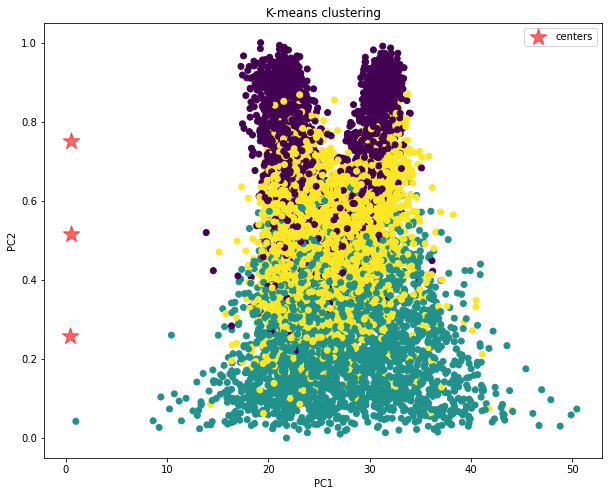

In [132]:
plt.figure(figsize=(10, 8))
# K-means clustering
plt.scatter(dfInsuranceA['sqrt_amt_cmv'],dfInsuranceA['minmax_amt_plob_motor'],
                     c=dfInsuranceA['clusters'], cmap='viridis')
plt.scatter(cent[:, 0], cent[:, 1],c='red', marker='*', s=300, alpha=0.6, label='centers')
plt.legend(loc='best')
plt.title('K-means clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')